## Libraries

In [1]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

### Funciones 

In [10]:
def mostrar_imagenes_gris(img1, img2, titulo1="Imagen 1", titulo2="Imagen 2"):
    
    # Crear una figura y establecer los títulos
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(img1, cmap='gray')
    plt.title(titulo1)
    plt.subplot(1, 2, 2)
    plt.imshow(img2, cmap='gray')
    plt.title(titulo2)
    
    # Mostrar las imágenes
    plt.show()

size =  (1200, 1600)


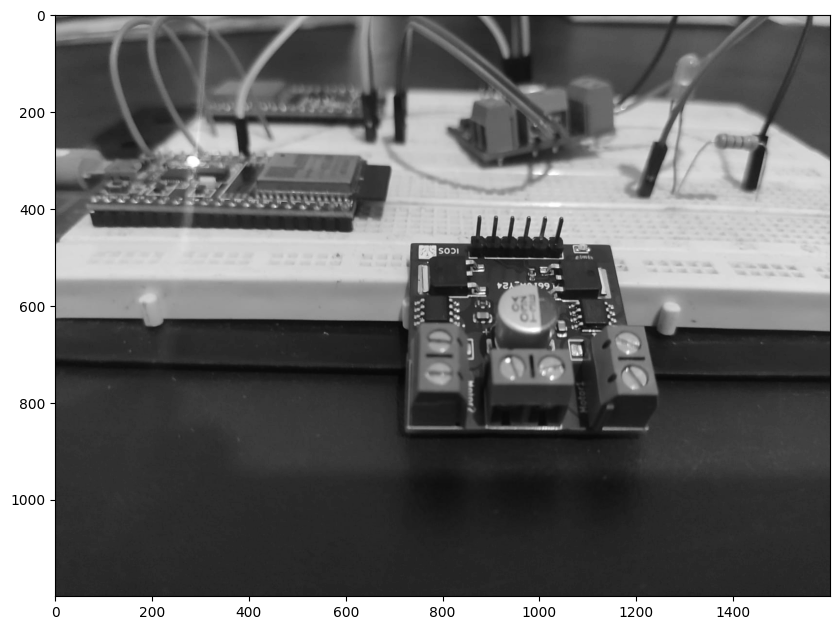

In [2]:
img = cv2.imread('driver_icos.jpeg',0)
print('size = ',img.shape)
plt.figure(figsize=(10,10))
plt.imshow(img,cmap='gray')
plt.show()

# Interpolation 

In [14]:
# Interpolation using nearest integer towards zero
def geo_transformation(X,A,Yshape=None):

  if Yshape is None:
    (N,M) = X.shape
  else:
    (N,M) = Yshape

  Y = np.zeros((N,M),np.uint8) # Create an N x M matrix filled with zeros, with each element represented as an unsigned 8-bit integer. 

  m = np.ones((N*M,3)) # Create a matrix with dimensions N*M x 3 filled with ones
  t = 0

  for i in range(N):
    for j in range(M):
      m[t,0:3] = [i,j,1]
      t = t+1

  m0  = np.dot(A,m.T)          # (i,j) -> (i0,j0) using equation explained above
  mpf = np.fix(m0).astype(int) # nearest integer towards zero
  
  # verification: does the pixel (i0,j0) belong to the image?
  i0 = mpf[0,:]
  j0 = mpf[1,:]
  kti = np.logical_and(i0>=0,i0<N)
  ktj = np.logical_and(j0>=0,j0<M)
  kt  = np.logical_and(kti,ktj)
  
  # output image
  t = 0
  for i in range(N):
    for j in range(M):
      if kt[t]:
        Y[i,j] = X[i0[t],j0[t]]
      t = t+1
  return Y

### Translation

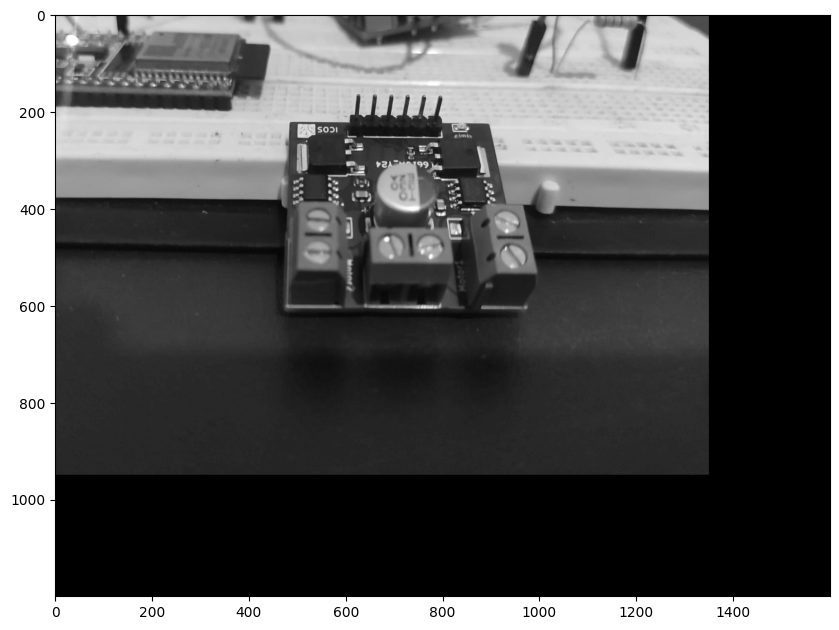

In [16]:
a11 = 1
a12 = 0
a13 = 250

a21 = 0
a22 = 1
a23 = 250

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(img,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

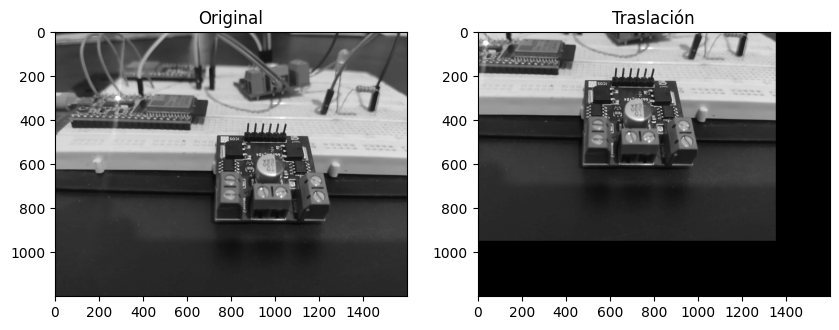

In [17]:
mostrar_imagenes_gris(img,Y,'Original','Traslación')

### Rotation

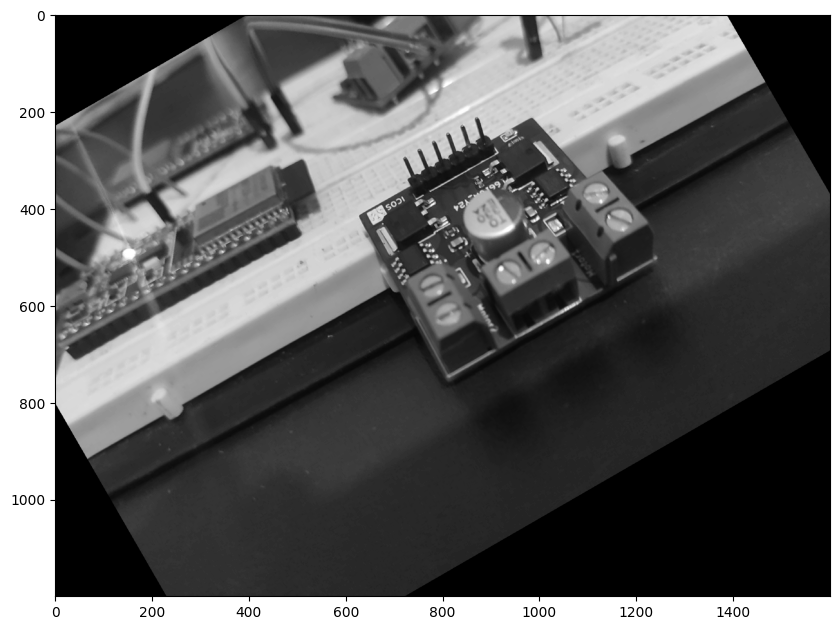

In [20]:
theta = 30.0 / 180.0 * np.pi
a11   = np.cos(theta)
a12   = np.sin(theta)
a13   = -200
a21   = -np.sin(theta)
a22   =  np.cos(theta)
a23   = 400
a1    = np.array([a11,a12,a13])
a2    = np.array([a21,a22,a23])
A     = np.vstack([a1,a2])
Y     = geo_transformation(img,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

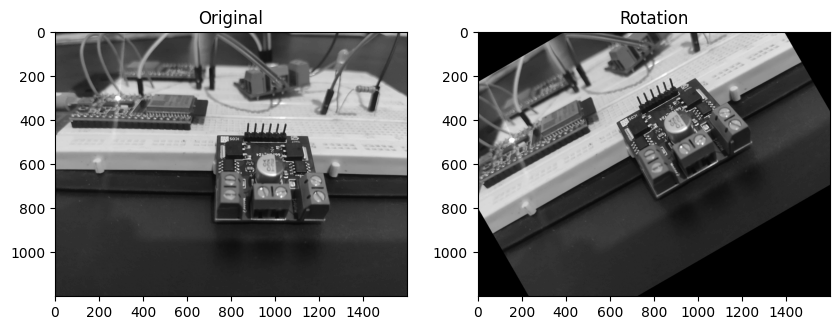

In [21]:
mostrar_imagenes_gris(img,Y,'Original','Rotation')

### Scaling

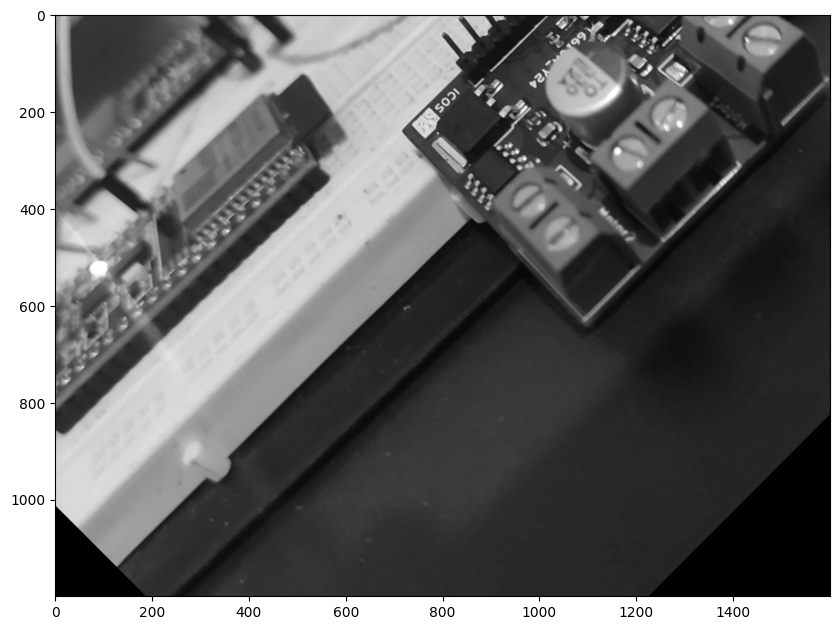

In [26]:
theta = 45.0 / 180.0 * np.pi

s     = 0.7


a11 = s*np.cos(theta)
a12 = s*np.sin(theta)
a13 = 0

a21 = -s*np.sin(theta)
a22 =  s*np.cos(theta)
a23 = 500

a1 = np.array([a11,a12,a13])
a2 = np.array([a21,a22,a23])

A  = np.vstack([a1,a2])

Y = geo_transformation(img,A)
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')
plt.show()

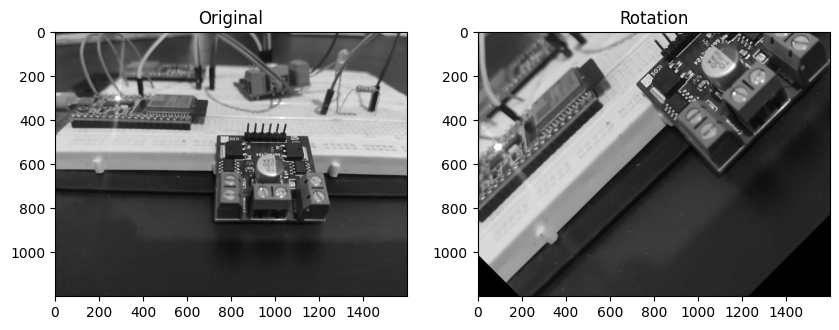

In [27]:
mostrar_imagenes_gris(img,Y,'Original','Rotation')

### Conversion Elipse - Circulo


size =  (502, 489)


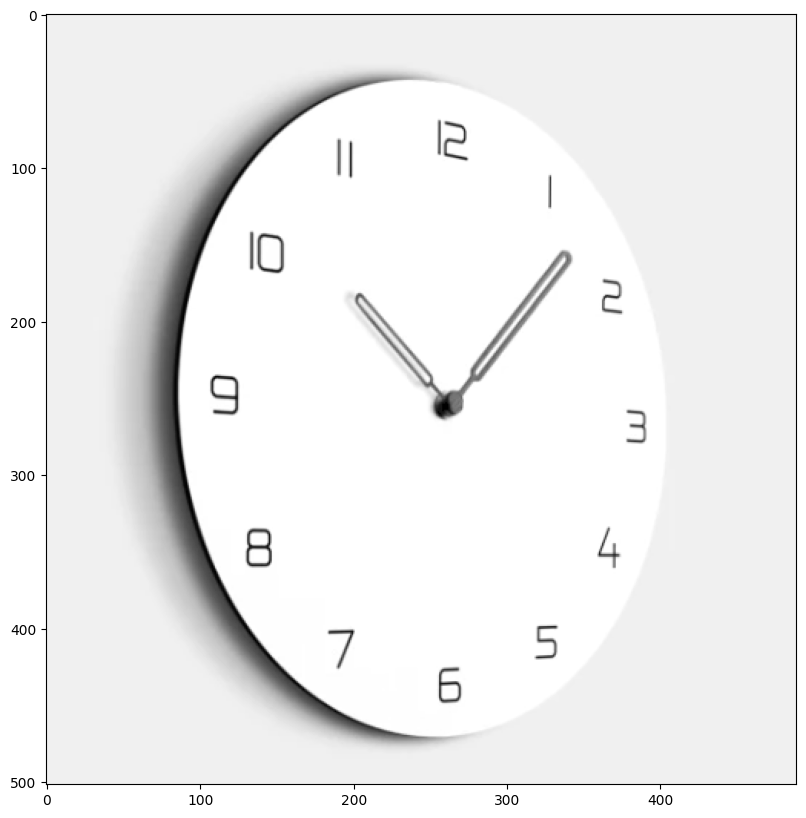

In [28]:
img2 = cv2.imread('reloj.png',0)
print('size = ',img2.shape)
plt.figure(figsize=(10,10))
plt.imshow(img2,cmap='gray')
plt.show()

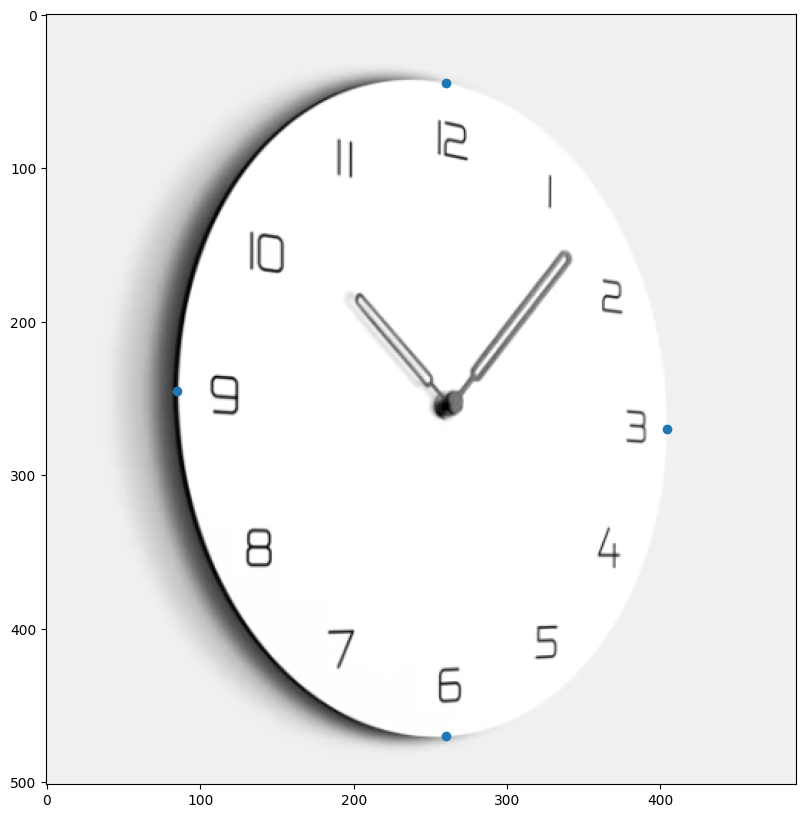

In [53]:
# Coordinates (i,j) (manually estimated for 12, 3, 6 y 9 o'clock):
b1 = np.array([44,260]).reshape(2,1)   # 12:00
b2 = np.array([270,404]).reshape(2,1)   # 03:00
b3 = np.array([470,260]).reshape(2,1)   # 06:00
b4 = np.array([245,85]).reshape(2,1)   # 09:00

i = [b1[0],b2[0],b3[0],b4[0]]
j = [b1[1],b2[1],b3[1],b4[1]]

plt.figure(figsize=(10,10))
plt.imshow(img2,cmap='gray')
plt.scatter(j,i)
plt.show()

In [83]:
# output, the four selected points are in the output image at coordinates (q+/-r,q+/-r)
r  = 240.0
q  = 242
m  = np.array([0,0,0])

c1 = np.array([q-r,q,1])
X1 = np.vstack([np.hstack([c1,m]),np.hstack([m,c1])])

c2 = np.array([q,q+r,1])
X2 = np.vstack([np.hstack([c2,m]),np.hstack([m,c2])])

c3 = np.array([q+r,q,1])
X3 = np.vstack([np.hstack([c3,m]),np.hstack([m,c3])])

c4 = np.array([q,q-r,1])
X4 = np.vstack([np.hstack([c4,m]),np.hstack([m,c4])])

A  = np.vstack([X1,X2,X3,X4])
b  = np.vstack([b1,b2,b3,b4])

t = np.linalg.lstsq(A, b, rcond=None)[0]  # inv(A'*A)*A'*b;


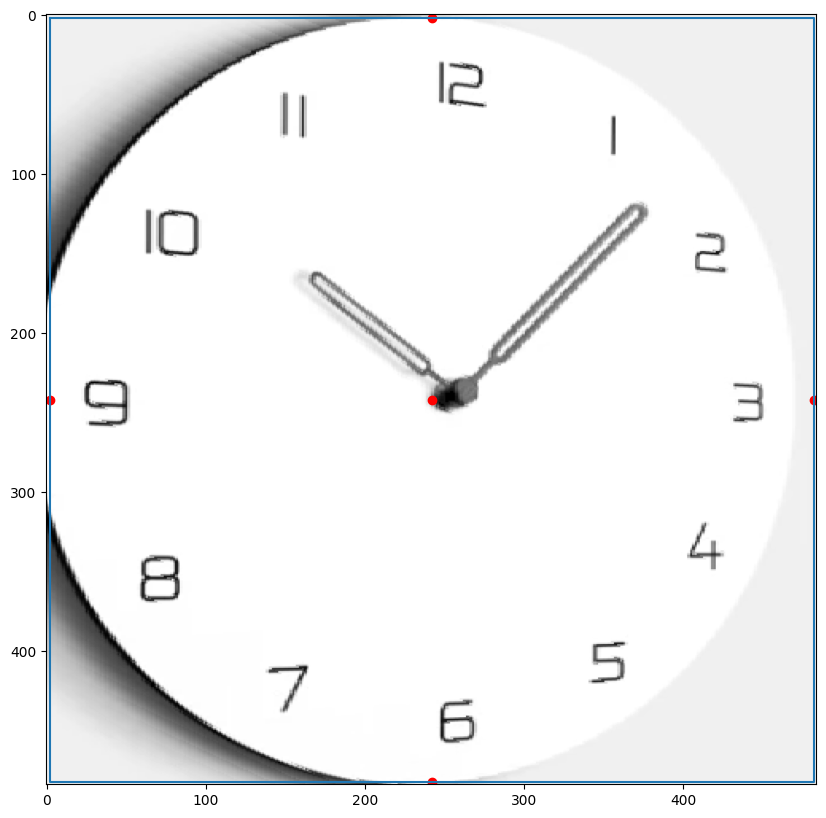

In [84]:
a1 = np.array([t[0],t[1],t[2]]).reshape(1,3)
a2 = np.array([t[3],t[4],t[5]]).reshape(1,3)

A  = np.vstack([a1,a2])


Y = geo_transformation(img2,A,(2*q,2*q))
plt.figure(figsize=(10,10))
plt.imshow(Y,cmap='gray')

i = np.array([q-r,q-r,q+r,q+r,q-r])
j = np.array([q-r,q+r,q+r,q-r,q-r])
plt.plot(j,i)

i = [c1[0],c2[0],c3[0],c4[0],q]
j = [c1[1],c2[1],c3[1],c4[1],q]
plt.scatter(j,i,c='red')

plt.show()